Logistic Regression Model

In [66]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

Load Dataset


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
df.isnull().sum().sum()

0

IQR Analysis

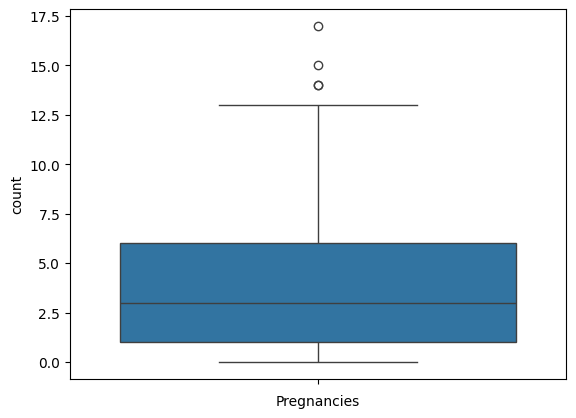

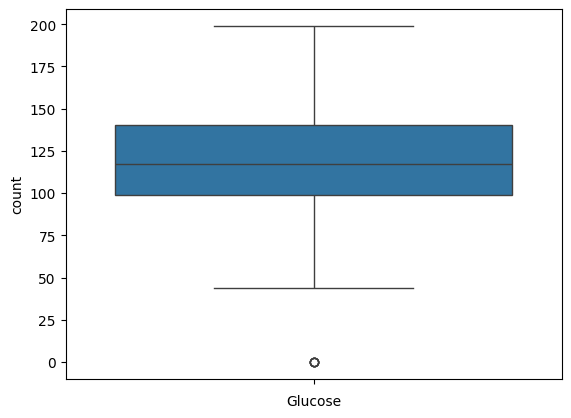

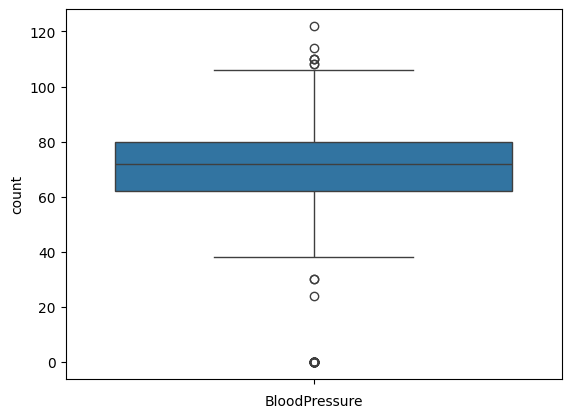

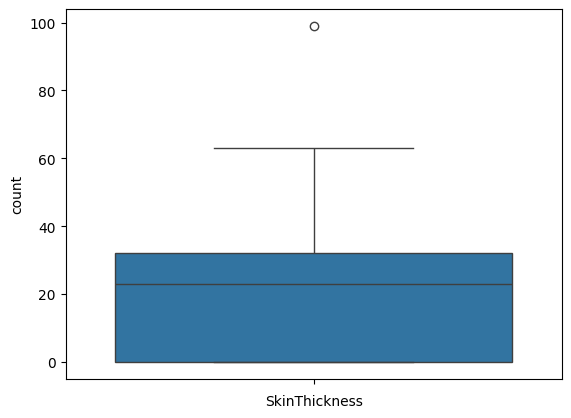

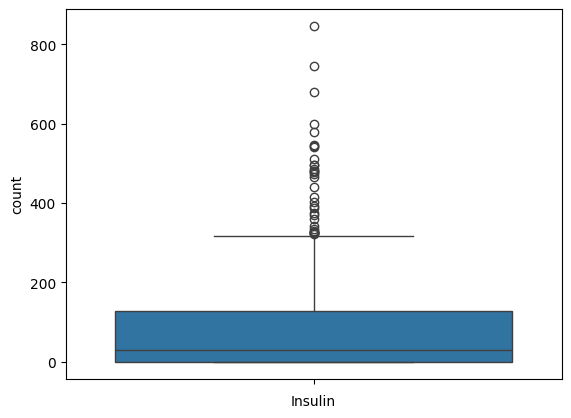

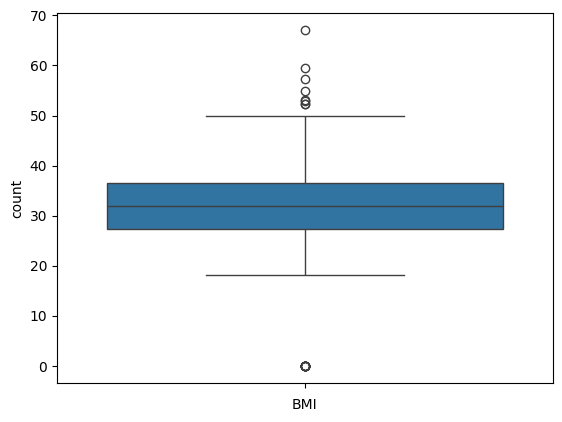

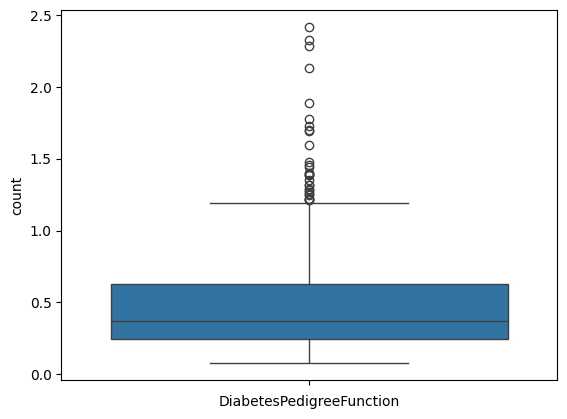

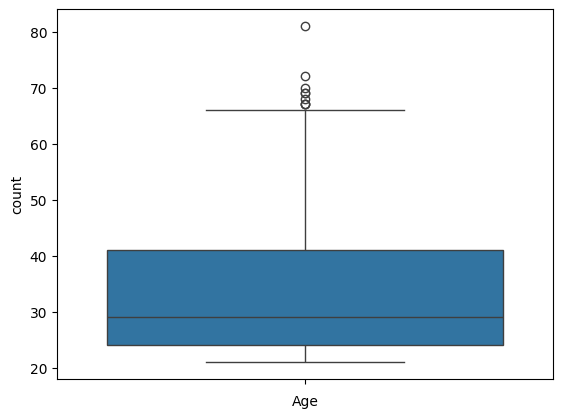

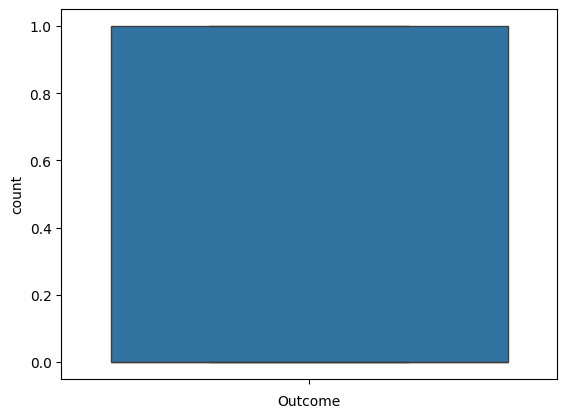

In [16]:
for i in df.columns:
  if ((df[i].dtypes == "int64") or (df[i].dtypes == "float64")):
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

In [19]:
out_list = ['Glucose','BMI','Insulin','BloodPressure','Age','DiabetesPedigreeFunction','Pregnancies']

for i in out_list:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3 - Q1

  df = df[(df[i]>= Q1-1.5*IQR) & (df[i]<= Q3+1.5*IQR)]

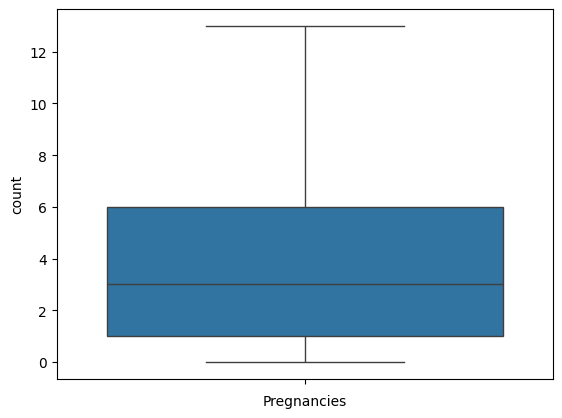

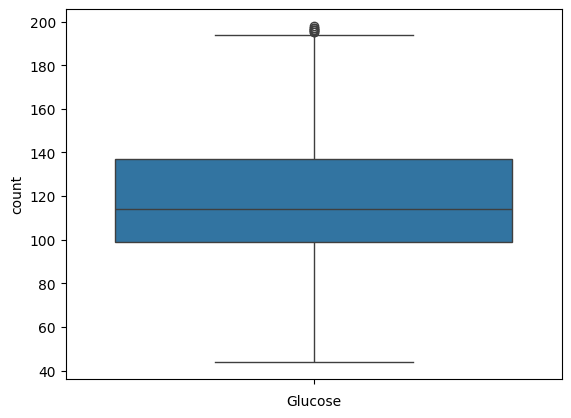

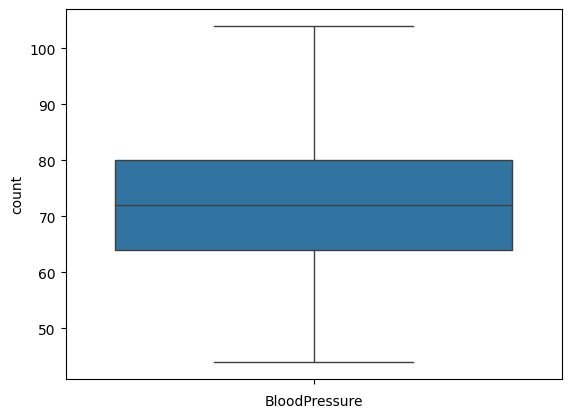

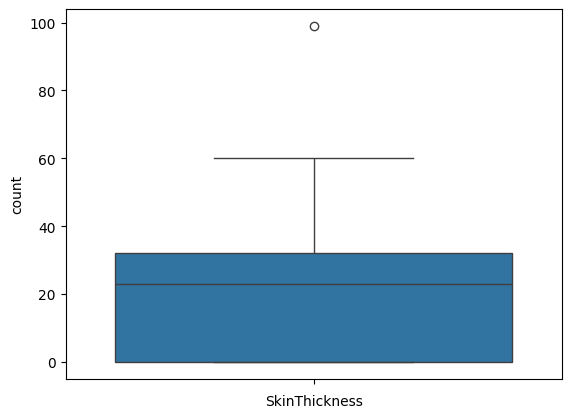

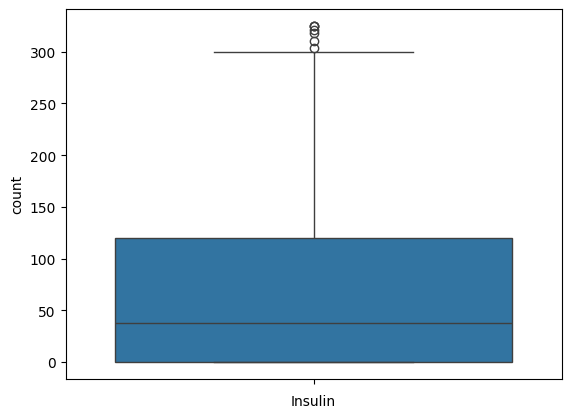

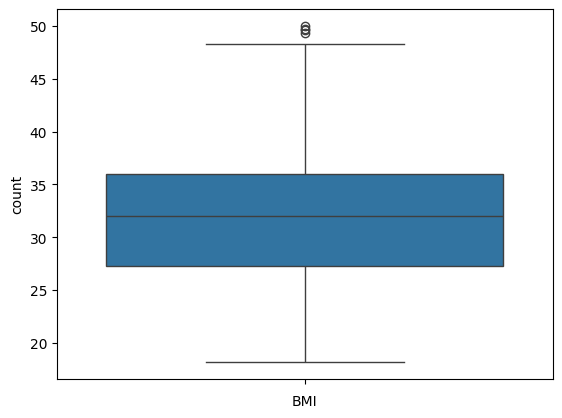

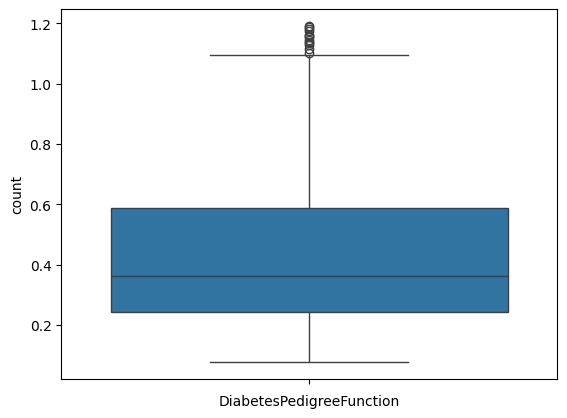

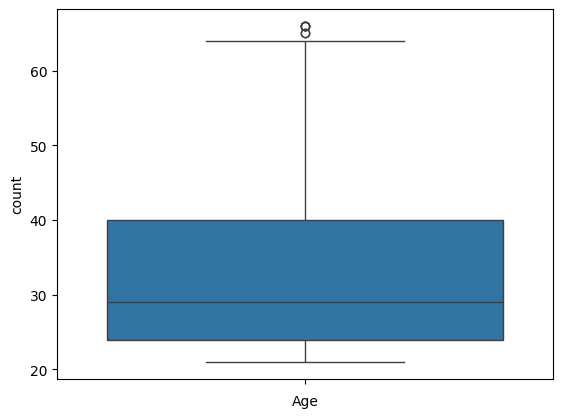

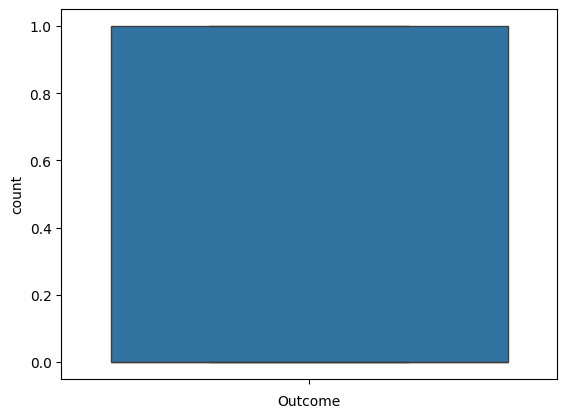

In [20]:
for i in df.columns:
  if ((df[i].dtypes == "int64") or (df[i].dtypes == "float64")):
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

In [22]:
df.duplicated().sum()

0

In [41]:
X = df.drop('Outcome', axis = 'columns')

In [43]:
y = df.Outcome

Model creating for Logistic Regression

In [27]:
model = LogisticRegression()

RFE for Features Selection

In [38]:
rfe = RFE(model)

In [44]:
rfe.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression())

In [45]:
rfe.support_

array([ True,  True, False, False, False,  True,  True, False])

In [50]:
X.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [53]:
X = X[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']]
X.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
5,5,116,25.6,0.201


In [54]:
y

,Outcome
0,1
1,0
2,1
3,0
5,0
...,...
763,0
764,0
765,0
766,1


Train Test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30, random_state= 999)

In [58]:
model.fit(X_train,y_train)

LogisticRegression()

In [61]:
X_test.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
188,8,109,27.9,0.640
379,0,93,43.4,1.021
412,1,143,42.4,1.076
450,1,82,21.2,0.415
532,1,86,41.3,0.917


In [62]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

Model Score

In [68]:
model.score(X_test, y_test)

0.78125

In [67]:
# Prediction

model.predict([[8,110,30,1.021]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])